# 1 - ML

## READING and TRANSFORMING

Read csv file

In [260]:
import pandas as pd

df = pd.read_csv('train.csv')

In [261]:
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [262]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'Embarked'], axis=1, inplace=True)

In [263]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age is missing values

In [264]:
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)
df = df.dropna(subset=['Age'])
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [265]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [266]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [267]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,28.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


## Model training
Dowloading test data

In [268]:
test_data = pd.read_csv('test.csv')

test_surv = pd.read_csv('gender_submission.csv')

test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [269]:
test_data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'Embarked'], axis=1, inplace=True)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

age_median = test_data['Age'].median()
test_data['Age'] = test_data['Age'].fillna(age_median)

Fare_median = test_data['Fare'].median()
test_data['Fare'] = test_data['Fare'].fillna(Fare_median)

Separate X and Y data columns

In [270]:
X_train = df.drop('Survived', axis = 1)
Y_train = df['Survived']


# Logistic Regression

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [272]:
model = LogisticRegression(max_iter=1000)

In [273]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [274]:
y_pred = model.predict(test_data)
LR_accuracy = accuracy_score(test_surv['Survived'], y_pred)
print("Accuracy:", LR_accuracy)

Accuracy: 0.9354066985645934


# Random Forest

In [275]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [276]:
y_pred = model.predict(test_data)
RF_accuracy = accuracy_score(test_surv['Survived'], y_pred)
print("Accuracy:", RF_accuracy)

Accuracy: 0.8181818181818182


# XGBoost

In [277]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [278]:
XGB_accuracy = accuracy_score(test_surv['Survived'], y_pred)
print("Accuracy:", XGB_accuracy)

Accuracy: 0.8181818181818182


## Results

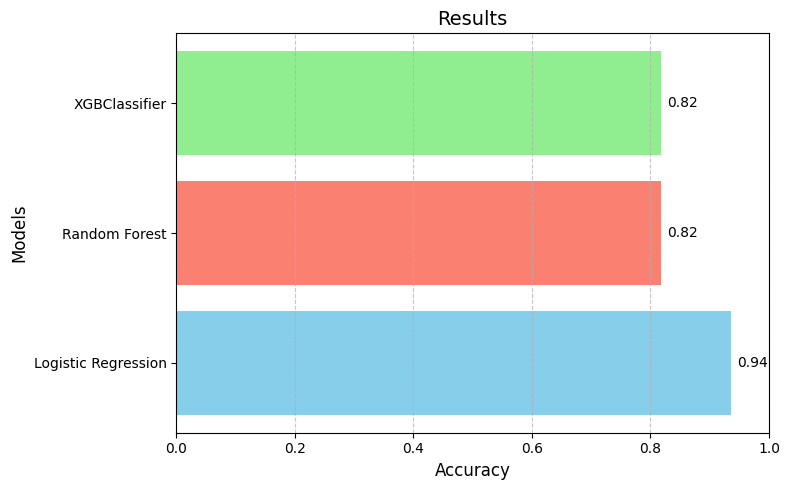

In [279]:
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'Random Forest', 'XGBClassifier']  
accuracy = [LR_accuracy, RF_accuracy, XGB_accuracy]

plt.figure(figsize=(8, 5))
bars = plt.barh(models, accuracy, color=['skyblue', 'salmon', 'lightgreen'])

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01,  # Pozycja X (szerokość słupka + margines)
             bar.get_y() + bar.get_height()/2,  # Pozycja Y (środek słupka)
             f'{width:.2f}',  # Formatowanie do 2 miejsc po przecinku
             va='center', ha='left', fontsize=10)

plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.title('Results', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.xlim(0, 1)

plt.tight_layout()
plt.show()